<a href="https://colab.research.google.com/github/xiomiliseth02-beep/Estad-stica-I/blob/main/Parte_Pr%C3%A1ctica_3_Parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Parte practica parcial III - Estadistica I
Integrantes:
*  Jhonatan Rodriguez 2240135
*   David Jaimes 2240136
*   Xiomara Muñoz 2240139
*   Yuliana Gomez 2231925

En este proyecto se busca analizar el comportamiento de dos variables estadísticas relacionadas con la población colombiana:

X = T_GES: Tiempo de gestacion de un nacido vivo.

Y = TALLA_NAC: Talla de nacimiento de un nacido vivo.

El propósito de este estudio es describir y comparar el comportamiento de ambas variables, así como determinar si existe una relación estadísticamente significativa entre ellas. Para ello, se aplicarán herramientas de análisis descriptivo y pruebas de correlación que permitan interpretar los resultados. Los datos fueron tomados de la base de datos del DANE y calculados usando el lenguaje Python mediante Google Colaboratory, con el fin de interpretar las posibles relaciones entre estas variables.

**Objetivo general:** La misión de este informe es responder a la pregunta: “¿Existe una relación entre el tiempo de gestacion y la talla de nacimiento de un nacido vivo?”

In [ ]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats


Saving BD-EEVV-Nacimientos-2023.csv to BD-EEVV-Nacimientos-2023.csv


# Estadítica descriptiva para Variables cualitativas


*   Gráficos para datos de una variable cualitativa
*   Proporciones asociadas a los valores de una variable cualitativa



In [ ]:
io_csv = io.BytesIO(uploaded["BD-EEVV-Nacimientos-2023.csv"])
tabla = pd.read_csv(io_csv, sep = ",",index_col=0, encoding='latin-1')
tabla.head (3)

,COD_MUNIC,AREANAC,SIT_PARTO,OTRO_SIT,SEXO,PESO_NAC,TALLA_NAC,ANO,MES,ATEN_PAR,...,N_HIJOSV,FECHA_NACM,N_EMB,SEG_SOCIAL,IDCLASADMI,EDAD_PADRE,NIV_EDUP,ULTCURPAD,PROFESION,TIPOFORMULARIO
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
23,417,1,1,NaN,1,8,5,2023,1,1,...,2,25/09/2015,2,2,2.0,44,99,99,1.0,1
11,1,1,1,NaN,2,6,4,2023,2,1,...,1,NaN,1,1,1.0,35,11,3,1.0,1
11,1,1,1,NaN,1,6,4,2023,7,1,...,1,NaN,1,1,1.0,32,9,6,1.0,1


In [ ]:
tabla1 = tabla[["T_GES","TALLA_NAC"]]
tabla1.head(4)

,T_GES,TALLA_NAC
COD_DPTO,,
23,4,5
11,4,4
11,4,4
11,4,5


In [ ]:
df2 = tabla1[(tabla1.T_GES < 9)& (tabla1.TALLA_NAC <9)]
df2.head(4)

,T_GES,TALLA_NAC
COD_DPTO,,
23,4,5
11,4,4
11,4,4
11,4,5


In [ ]:
df2.T_GES.head(2)
df2.T_GES =df2.T_GES.astype(str)
df2.T_GES.head(2)

/tmp/ipython-input-3752385411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.T_GES =df2.T_GES.astype(str)


,T_GES
COD_DPTO,
23,4
11,4


In [ ]:
df2.loc[(df2.T_GES == "1"), "T_GES"] = "<22"
df2.loc[(df2.T_GES == "2"), "T_GES"] = "22-27"
df2.loc[(df2.T_GES == "3"), "T_GES"] = "28-37"
df2.loc[(df2.T_GES == "4"), "T_GES"] = "38-41"
df2.loc[(df2.T_GES == "5"), "T_GES"] = "42<"
df2.loc[(df2.T_GES == "6"), "T_GES"] = "IGNORADO"
df2.loc[(df2.T_GES == "7"), "T_GES"] = "NA"




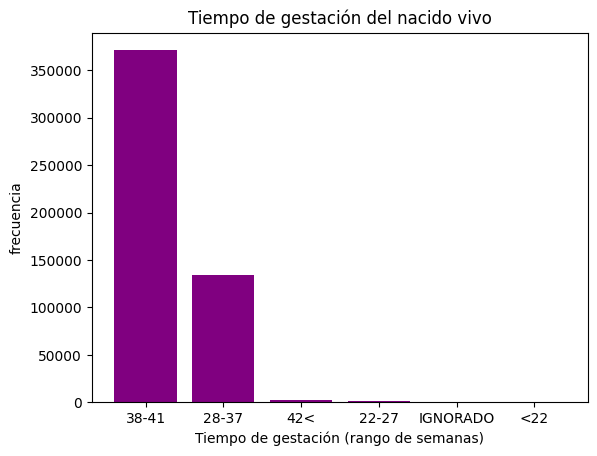

In [ ]:
x_values = df2.T_GES.unique()
y_values = df2.T_GES.value_counts().tolist()
plt.bar(x_values, y_values, color = "purple")
plt.title('Tiempo de gestación del nacido vivo')
ax = plt.subplot()# Axis
ax.set_xlabel('Tiempo de gestación (rango de semanas)')
ax.set_ylabel('frecuencia')
plt.show()

La moda de la variable de tiempo de gestacion es de 38 a 41 semanas con una frecuencia de ocurrencia alrededor de 37000. De 28 a 37 se tiene una frecuencia de alrededor de 14000. NO se presentan valores muy extremos, por tanto esos fueron ignorados. Mas de 42 semanas es muy poco frecuente, de igual forma de 22 a 27 semanas. Por ultimo no se presentan datos de nacidos con tiempo de gestacion menor a 22 semanas.

In [ ]:
sizes = np.array(y_values)
sizes

array([371090, 134513,   1950,    778,    477,     19])

<function matplotlib.pyplot.show(close=None, block=None)>

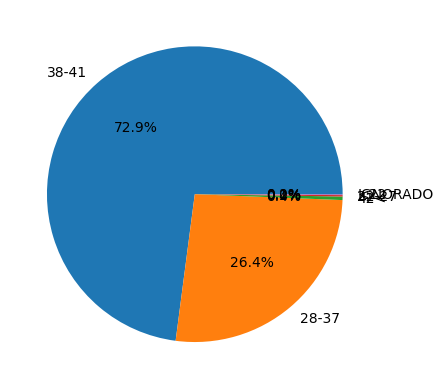

In [ ]:
plt.pie(y_values, labels = x_values, autopct = '%1.1f%%')
plt.show

In [ ]:
len(df2.T_GES)


508827

In [ ]:
Porcentaje = [(x/len(df2.T_GES)*100)for x in y_values]
print(x_values)
print(Porcentaje)

['38-41' '28-37' '42<' '22-27' 'IGNORADO' '<22']
[72.93048521403149, 26.43590061062011, 0.383234380251048, 0.1529006911975976, 0.09374502532294866, 0.003734078576805083]


El 72% de los nacidos vivos tienen un tiempo de gestacion de 38 a 41 semanas, esto es considerado el estandar para un embarazo tipico. Luego siguen de 28 a 37 que corresponden al 26%, esto ya es considerado un parto prematuro. Es ligeramente mas comun tener un embarazo de mas de 42 semanas con un 0.38% comparado con el 0.09% de tener un embarazo de entre 22 a 27 semanas. De menos de 22 semanas ya es muy atipico correspondiendo al 0.003%.

En conclucion la variable de tiempo de gestacion indica que la mayoria de nacidos vivos en colombia, nacen en un tiempo medicamente adecuado, sin embargo hay una proporcion significativa de casos prematuros y los casos extremos son muy infrecuentes. Por tanto las gestaciones suelen desarrollarse en rangos habituales.

#Sea la variable $Y=$ "Talla del nacido vivo, al nacer" $=$"TALLA_NAC"

In [ ]:
df2.loc[(df2.TALLA_NAC == "1"), "TALLA_NAC"] = "20"
df2.loc[(df2.TALLA_NAC == "2"), "TALLA_NAC"] = "20-29"
df2.loc[(df2.TALLA_NAC == "3"), "TALLA_NAC"] = "30-39"
df2.loc[(df2.TALLA_NAC == "4"), "TALLA_NAC"] = "40-49"
df2.loc[(df2.TALLA_NAC == "5"), "TALLA_NAC"] = "50-59"
df2.loc[(df2.TALLA_NAC == "6"), "TALLA_NAC"] = "60<"
df2.loc[(df2.TALLA_NAC == "9"), "TALLA_NAC"] = "NA"
df2.T_GES, df2.TALLA_NAC = df2.T_GES.astype(str),df2.TALLA_NAC.astype(str)
df2.head(4)

/tmp/ipython-input-3320067256.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '20' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2.loc[(df2.TALLA_NAC == "1"), "TALLA_NAC"] = "20"
/tmp/ipython-input-3320067256.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.T_GES, df2.TALLA_NAC = df2.T_GES.astype(str),df2.TALLA_NAC.astype(str)


,T_GES,TALLA_NAC
COD_DPTO,,
23,38-41,5
11,38-41,4
11,38-41,4
11,38-41,5


In [ ]:
df2.TALLA_NAC.head(2)
df2.TALLA_NAC =df2.TALLA_NAC.astype(str)
df2.TALLA_NAC.head(2)

/tmp/ipython-input-1664055555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.TALLA_NAC =df2.TALLA_NAC.astype(str)


,TALLA_NAC
COD_DPTO,
23,5
11,4


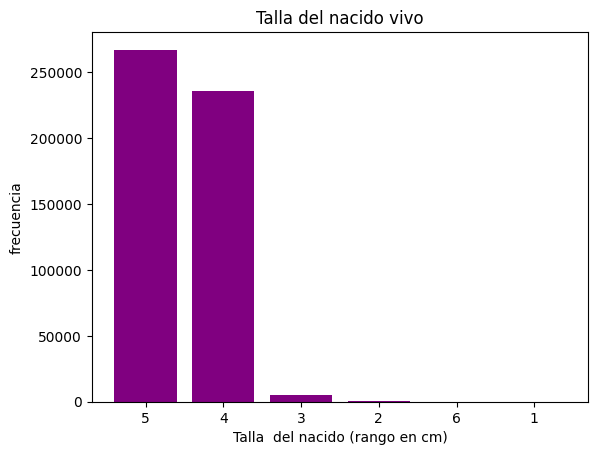

In [ ]:
x_values1 = df2.TALLA_NAC.unique()
y_values1 = df2.TALLA_NAC.value_counts().tolist()
plt.bar(x_values1, y_values1, color = "purple")
plt.title('Talla del nacido vivo')
ax = plt.subplot()
ax.set_xlabel("Talla  del nacido (rango en cm)")
ax.set_ylabel('frecuencia')
plt.show()

In [ ]:
sizes = np.array(y_values1)
sizes

array([267220, 236205,   5071,    307,     20,      4])

Se puede observar que la moda de la variable Y ronda entre los 50 y 59 cm con una frecuencia de ocurrencia alrededor de 267220. De 40 a 49 se tiene una frecuencia de alrededor de 236205. No se presentan valores muy extremos, por tanto esos fueron ignorados. Mas de 60 cm presenta frecuencia minima, de igual forma que menor de 20 cm. Por ultimo la frecuencia de la valiabre entre 20 y 29 es de 307.

<function matplotlib.pyplot.show(close=None, block=None)>

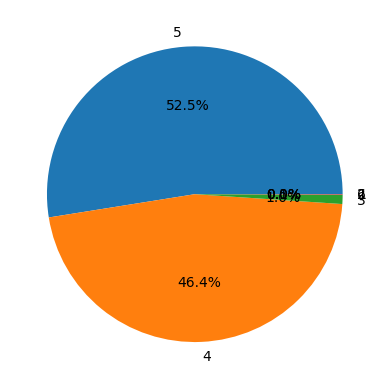

In [ ]:
plt.pie(y_values1, labels = x_values1, autopct = '%1.1f%%')
plt.show

In [ ]:
len(df2.TALLA_NAC)

508827

In [ ]:
Porcentaje = [(x/len(df2.TALLA_NAC)*100)for x in y_values1]
print(x_values1)
print(Porcentaje)

['5' '4' '3' '2' '6' '1']
[52.516867225992335, 46.421475275486564, 0.9966059191041355, 0.060334848583113714, 0.0039306090282158765, 0.0007861218056431753]


El 52% de los nacidos vivos miden entre 50 y 59, por lo tanto esto es considerado el estandar para un nacimiento tipico. Luego siguen de 40 a 49 que corresponden al 46%, esto sigue siendo considerado una medida comun. los valores fuera de estos intervalos se considerarian atipicos ya que cada uno tieneun porceentaje menor al 0.5%

En conclucion, la variable $Y$ indica que la talla de la mayoria de nacidos vivos en colombia, nacen en con una medida medicamente adecuada, existiendo una pequeña proporcion de casos de tallas anormales y los casos no registrados son muy infrecuentes. Por tanto los bebes de colombia suelen nacer en rangos de tallas habituales.

#Tablas de contingencia


*   Representacion gráfica de una tabla de contingencia  
*   Proporciones asociadas a una tabla de contingencia



In [ ]:
tabla_cont = pd.crosstab(df2.T_GES, df2["TALLA_NAC"])
tabla_cont

TALLA_NAC,20-29,30-39,40-49,50-59,60<,<20
T_GES,,,,,,
22-27,251,1646,50,1,0,2
28-37,44,3357,95455,35657,0,0
38-41,0,46,140106,230919,19,0
42<,0,0,116,360,1,0
<22,11,5,0,1,0,2
IGNORADO,1,17,478,282,0,0


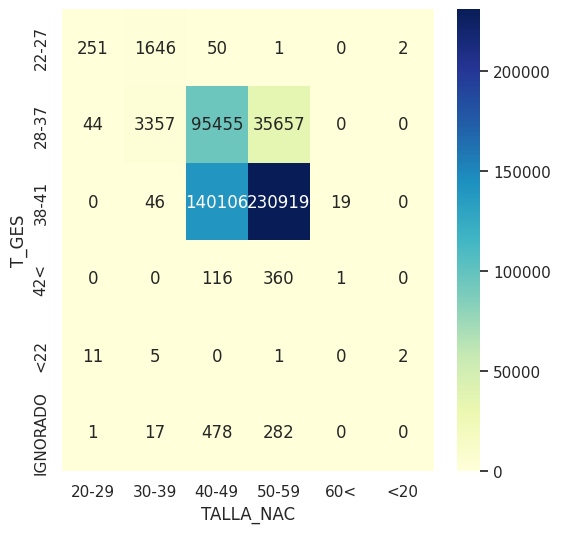

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(tabla_cont, annot=True, fmt= 'd', cmap="YlGnBu", cbar=True)
plt.show()


In [ ]:
res = stats.chi2_contingency(tabla_cont)
chi, valor_p, _, _ =res
print(f"El valor de la estadística Chi cuadrado es {chi}y el valor p es d{valor_p} ")


El valor de la estadística Chi cuadrado es 283302.7467337463y el valor p es d0.0 


Se determinará si una variable depende de la otra o, están asociadas, entonces, se tiene:

*   H₀: 'Tiempo de gestación' y 'Talla de nacimiento' no están relacionadas.
*   Hₐ: 'Tiempo de gestación' y 'Talla de nacimiento' están relacionadas.
*   Si el valor de p < 0.05 se rechaza la hipótesis nula.
*   Si el valor de p > 0.05 no se rechaza la hipótesis nula.

Entonces, se tiene que el valor de Chi-cuadrado es 283302.7467337463 y el valor de p es 0.0. Como el valor p = 0.0 es menor que 0.05, se rechaza la hipótesis nula, es decir, se rechaza con una confianza del 95% que el 'Tiempo de gestación' y la 'Talla de nacimiento' son independientes.

In [ ]:
import math
coeficiente_contingencia = math.sqrt(chi/(chi + len(df2.TALLA_NAC)))
coeficiente_phi = math.sqrt(chi/len(df2.TALLA_NAC))
coeficiente_v_cramer = math.sqrt(chi/(len(df2.TALLA_NAC)*min(6-1,6-1)))
print(f"los coeficientes de contingencia, phi y V de Cramer están respectivamente dados por {coeficiente_contingencia} , {coeficiente_phi} y {coeficiente_v_cramer}")

los coeficientes de contingencia, phi y V de Cramer están respectivamente dados por 0.5980358668183134 , 0.7461743542999918 y 0.3336993158563588


Ahora, se determinará qué tan dependiente es una variable de la otra o qué tan asociadas están ambas. Por tanto, de acuerdo al artículo Landis, J. R., & Koch, G. G. (1977). The measurement of observer agreement for categorical data. biometrics, 159-174. [link](https://www.jstor.org/stable/2529310), las variables 'Tiempo de gestación' y 'Talla de nacimiento' están relacionadas discretamente, basándonos principalmente en el coeficiente V de Cramer tiene un valor = 0.0.3336993158563588, el cual se ecuentra en el rango ($0.2 < \chi^2, \phi, V < 0.4$)

Donde:

*   _______ = nula ($\chi^2, \phi, V ≈ 0$)
*   _______ = insignificantemente ($0 < \chi^2, \phi, V < 0.2$)
*   _______ = discretamente ($0.2 < \chi^2, \phi, V < 0.4$)
*   _______ = moderadamente ($0.4 < \chi^2, \phi, V < 0.6$)
*   _______ = sustancialmente ($0.6 < \chi^2, \phi, V < 0.8$)
*   _______ = fuertemente ($0.8 < \chi^2, \phi, V < 1$)

**Interpretación general:**

*   La 'Talla de nacimiento' depende discretamente del 'Tiempo de gestación'
*   El 'Tiempo de gestación' y la 'Talla de nacimiento'son discretamente homogéneas
*   'Tiempo de gestación' y 'Talla de nacimiento' están discretamente asociadas

Esto indica que aunque el 'Tiempo de gestación' influye en la 'Talla de nacimiento', asimismo hay otros factores que también contribuyen a esta variable.

# Conclusiones:

Las variables analizadas fueron el tiempo de gestacion y la talla de nacimiento de un nacido vivo en colombia. Se determino que ambas variables tienen una fuerte moda y los datos no estan muy alejados de esta. Lo que implica que la mayoria de nacidos vivos tienen unos tiempos de gestacion y unas tallas que se consideran medicamente estandar. De igual forma los datos muy lejanos a la moda son muy atipicos. Por ultimo se determino que estas variables dependen un poco de la otra, pero que la correlacion no es lo suficientemente fuerte como para no considerar otras variables influyentes.